# Лабораторная работа 3.3.4 "Эффект Холла в полупроводниках"

In [4]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from math import pi, sqrt
import numpy as np
from IPython.display import display, HTML
from scipy.interpolate import interp2d


# Приношу извенения за качество кода: писал ночью😅

Тут вбиваем данные

In [5]:
# Калибровочная зависимоть Игдукции магнитного поля от Силы тока через электромагнит
dataIB = pd.DataFrame({
    "I" : [10, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 700, 800, 900, 1000, 1100, 1200, 1400, 1570],
    "B" : [28, 117.9, 152.1, 200.3, 257.6, 309.9, 361.4, 436.2, 481.5, 538.8, 576, 600, 745, 812, 876, 934, 989, 1030, 1086, 1122]
})
dataIB = dataIB * 1e-3
print("Калибровочная зависимоть Игдукции магнитного поля от Силы тока через электромагнит")
display(dataIB)


# 8 Серий замеров зависимости Напряжения Холла от Силы тока
dataIU34_1 = pd.DataFrame({
    "I" : [200, 400, 600, 800, 1000, 1200, 1400, 1500],
    "U" : [21, 46, 69, 90, 106, 118, 126, 130]
})
dataIU34_1["I"] = dataIU34_1["I"] * 1e-3
dataIU34_1["U"] = dataIU34_1["U"] * 1e-6
print("серия 1")
display(dataIU34_1)

dataIU34_2 = pd.DataFrame({
    "I" : [200, 400, 600, 800, 1000, 1200, 1400],
    "U" : [30, 65, 100, 128, 151, 168, 179]
})
dataIU34_2["I"] = dataIU34_2["I"] * 1e-3
dataIU34_2["U"] = dataIU34_2["U"] * 1e-6
print("серия 2")
display(dataIU34_2)

dataIU34_3 = pd.DataFrame({
    "I" : [200, 400, 600, 800, 1000, 1200, 1400],
    "U" : [40, 81, 121, 158, 190, 207, 222]
})
dataIU34_3["I"] = dataIU34_3["I"] * 1e-3
dataIU34_3["U"] = dataIU34_3["U"] * 1e-6
print("серия 3")
display(dataIU34_3)

dataIU34_4 = pd.DataFrame({
    "I" : [200, 400, 600, 800, 1000, 1200, 1400],
    "U" : [46, 96, 145, 188, 224, 247, 264]
})
dataIU34_4["I"] = dataIU34_4["I"] * 1e-3
dataIU34_4["U"] = dataIU34_4["U"] * 1e-6
print("серия 4")
display(dataIU34_4)

dataIU34_5 = pd.DataFrame({
    "I" : [200, 400, 600, 800, 1000, 1200, 1400],
    "U" : [51, 111, 170, 220, 260, 288, 309]
})
dataIU34_5["I"] = dataIU34_5["I"] * 1e-3
dataIU34_5["U"] = dataIU34_5["U"] * 1e-6
print("серия 5")
display(dataIU34_5)

dataIU34_6 = pd.DataFrame({
    "I" : [200, 400, 600, 800, 1000, 1200, 1400],
    "U" : [59, 127, 188, 253, 300, 328, 351]
})
dataIU34_6["I"] = dataIU34_6["I"] * 1e-3
dataIU34_6["U"] = dataIU34_6["U"] * 1e-6
print("серия 6")
display(dataIU34_6)

dataIU34_7 = pd.DataFrame({
    "I" : [200, 400, 600, 800, 1000, 1200, 1400],
    "U" : [71, 143, 221, 284, 335, 370, 396]
})
dataIU34_7["I"] = dataIU34_7["I"] * 1e-3
dataIU34_7["U"] = dataIU34_7["U"] * 1e-6
print("серия 7")
display(dataIU34_7)

dataIU34_8 = pd.DataFrame({
    "I" : [200, 400, 600, 800, 1000, 1200, 1400],
    "U" : [80, 160, 243, 318, 372, 413, 442]
})
dataIU34_8["I"] = dataIU34_8["I"] * 1e-3
dataIU34_8["U"] = dataIU34_8["U"] * 1e-6
print("серия 8")
display(dataIU34_8)


# Вставили образец с полупроводником другой стороной
dataIU34_a = pd.DataFrame({
    "I" : [200, 400, 600, 800, 1000, 1200, 1400],
    "U" : [-120, -204, -284, -355, -412, -450, -479]
})
dataIU34_a["I"] = dataIU34_a["I"] * 1e-3
dataIU34_a["U"] = dataIU34_a["U"] * 1e-6
print("серия обратной стороной")
display(dataIU34_a)


# I - токи через образец, угловые коэффициенты будут вычислены и вставлены сюда позже
dataKI = pd.DataFrame({
    "I" : [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "K" : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
})
dataKI["I"] = dataKI["I"] * 1e-3

Калибровочная зависимоть Игдукции магнитного поля от Силы тока через электромагнит


,I,B
0,0.01,0.0280
1,0.10,0.1179
2,0.15,0.1521
3,0.20,0.2003
4,0.25,0.2576
5,0.30,0.3099
6,0.35,0.3614
7,0.40,0.4362
8,0.45,0.4815
9,0.50,0.5388


серия 1


,I,U
0,0.2,0.000021
1,0.4,0.000046
2,0.6,0.000069
3,0.8,0.000090
4,1.0,0.000106
5,1.2,0.000118
6,1.4,0.000126
7,1.5,0.000130


серия 2


,I,U
0,0.2,0.000030
1,0.4,0.000065
2,0.6,0.000100
3,0.8,0.000128
4,1.0,0.000151
5,1.2,0.000168
6,1.4,0.000179


серия 3


,I,U
0,0.2,0.000040
1,0.4,0.000081
2,0.6,0.000121
3,0.8,0.000158
4,1.0,0.000190
5,1.2,0.000207
6,1.4,0.000222


серия 4


,I,U
0,0.2,0.000046
1,0.4,0.000096
2,0.6,0.000145
3,0.8,0.000188
4,1.0,0.000224
5,1.2,0.000247
6,1.4,0.000264


серия 5


,I,U
0,0.2,0.000051
1,0.4,0.000111
2,0.6,0.000170
3,0.8,0.000220
4,1.0,0.000260
5,1.2,0.000288
6,1.4,0.000309


серия 6


,I,U
0,0.2,0.000059
1,0.4,0.000127
2,0.6,0.000188
3,0.8,0.000253
4,1.0,0.000300
5,1.2,0.000328
6,1.4,0.000351


серия 7


,I,U
0,0.2,0.000071
1,0.4,0.000143
2,0.6,0.000221
3,0.8,0.000284
4,1.0,0.000335
5,1.2,0.000370
6,1.4,0.000396


серия 8


,I,U
0,0.2,0.000080
1,0.4,0.000160
2,0.6,0.000243
3,0.8,0.000318
4,1.0,0.000372
5,1.2,0.000413
6,1.4,0.000442


серия обратной стороной


,I,U
0,0.2,-0.000120
1,0.4,-0.000204
2,0.6,-0.000284
3,0.8,-0.000355
4,1.0,-0.000412
5,1.2,-0.000450
6,1.4,-0.000479


Калибровочный график

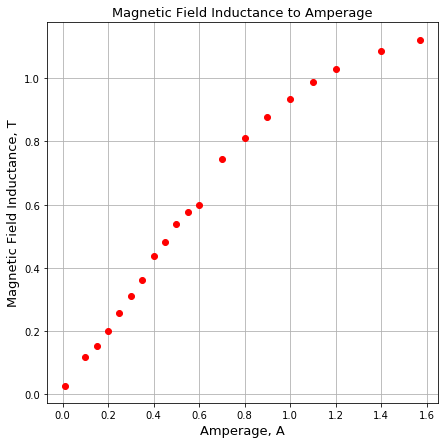

In [6]:
plt.figure(figsize=(7,7))
plt.plot(dataIB["I"], dataIB["B"], 'o', color = "red" )
plt.title("Magnetic Field Inductance to Amperage", fontsize = 13)
plt.ylabel("Magnetic Field Inductance, T", fontsize = 13)
plt.xlabel("Amperage, A", fontsize = 13)
plt.grid(True)
plt.show()

Аппроксимируем калибровочный график полиномом второй степени

In [7]:
#Polinomial regression

xx = np.array(dataIB["I"].values.reshape(20))
yy = np.array(dataIB["B"].values.reshape(20))
weights = np.polyfit(xx, yy, 2)
model = np.poly1d(weights)

def y(x):
    return model(x)


Не линеаризованные данные

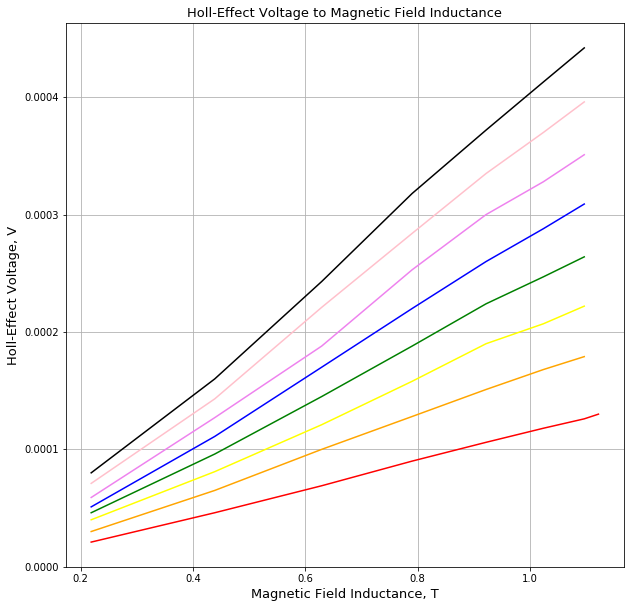

In [8]:
#raw data
plt.figure(figsize=(10,10))
plt.plot(y(dataIU34_1["I"]), dataIU34_1["U"], color = "red")
plt.plot(y(dataIU34_2["I"]), dataIU34_2["U"], color = "orange")
plt.plot(y(dataIU34_3["I"]), dataIU34_3["U"], color = "yellow")
plt.plot(y(dataIU34_4["I"]), dataIU34_4["U"], color = "green")
plt.plot(y(dataIU34_5["I"]), dataIU34_5["U"], color = "blue")
plt.plot(y(dataIU34_6["I"]), dataIU34_6["U"], color = "violet")
plt.plot(y(dataIU34_7["I"]), dataIU34_7["U"], color = "pink")
plt.plot(y(dataIU34_8["I"]), dataIU34_8["U"], color = "black")
plt.title("Holl-Effect Voltage to Magnetic Field Inductance", fontsize = 13)
plt.ylabel("Holl-Effect Voltage, V", fontsize = 13)
plt.xlabel("Magnetic Field Inductance, T", fontsize = 13)
plt.grid(True)
plt.show()

Аппроксимируем при помощи МНК и строим графики

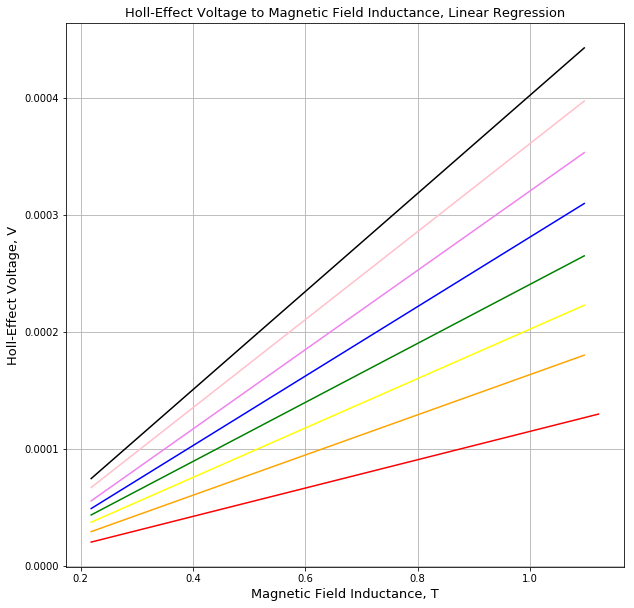

In [15]:
#data with regression
x1 = y(dataIU34_1["I"])
y1 = dataIU34_1["U"].values
x1 = x1.reshape(len(dataIU34_1["I"]), 1)
y1 = y1.reshape(len(dataIU34_1["I"]), 1)
regr1 = linear_model.LinearRegression()
regr1.fit(x1, y1)

x2 = y(dataIU34_2["I"])
y2 = dataIU34_2["U"].values
x2 = x2.reshape(len(dataIU34_2["I"]), 1)
y2 = y2.reshape(len(dataIU34_2["I"]), 1)
regr2 = linear_model.LinearRegression()
regr2.fit(x2, y2)

x3 = y(dataIU34_3["I"])
y3 = dataIU34_3["U"].values
x3 = x3.reshape(len(dataIU34_3["I"]), 1)
y3 = y3.reshape(len(dataIU34_3["I"]), 1)
regr3 = linear_model.LinearRegression()
regr3.fit(x3, y3)

x4 = y(dataIU34_4["I"])
y4 = dataIU34_4["U"].values
x4 = x4.reshape(len(dataIU34_4["I"]), 1)
y4 = y4.reshape(len(dataIU34_4["I"]), 1)
regr4 = linear_model.LinearRegression()
regr4.fit(x4, y4)

x5 = y(dataIU34_5["I"])
y5 = dataIU34_5["U"].values
x5 = x5.reshape(len(dataIU34_5["I"]), 1)
y5 = y5.reshape(len(dataIU34_5["I"]), 1)
regr5 = linear_model.LinearRegression()
regr5.fit(x5, y5)

x6 = y(dataIU34_6["I"])
y6 = dataIU34_6["U"].values
x6 = x6.reshape(len(dataIU34_6["I"]), 1)
y6 = y6.reshape(len(dataIU34_6["I"]), 1)
regr6 = linear_model.LinearRegression()
regr6.fit(x6, y6)

x7 = y(dataIU34_7["I"])
y7 = dataIU34_7["U"].values
x7 = x7.reshape(len(dataIU34_7["I"]), 1)
y7 = y7.reshape(len(dataIU34_7["I"]), 1)
regr7 = linear_model.LinearRegression()
regr7.fit(x7, y7)

x8 = y(dataIU34_8["I"])
y8 = dataIU34_8["U"].values
x8 = x8.reshape(len(dataIU34_8["I"]), 1)
y8 = y8.reshape(len(dataIU34_8["I"]), 1)
regr8 = linear_model.LinearRegression()
regr8.fit(x8, y8)

plt.figure(figsize=(10,10))
plt.plot(x1, regr1.predict(x1), color='red')
plt.plot(x2, regr2.predict(x2), color='orange')
plt.plot(x3, regr3.predict(x3), color='yellow')
plt.plot(x4, regr4.predict(x4), color='green')
plt.plot(x5, regr5.predict(x5), color='blue')
plt.plot(x6, regr6.predict(x6), color='violet')
plt.plot(x7, regr7.predict(x7), color='pink')
plt.plot(x8, regr8.predict(x8), color='black')
plt.title("Holl-Effect Voltage to Magnetic Field Inductance, Linear Regression", fontsize = 13)
plt.ylabel("Holl-Effect Voltage, V", fontsize = 13)
plt.xlabel("Magnetic Field Inductance, T", fontsize = 13)
plt.grid(True)
plt.show()

Заполняем зависимость коэффициентов наклона от Силы тока через образец

In [10]:
dataKI["K"][0] = regr1.coef_[0][0]
dataKI["K"][1] = regr2.coef_[0][0]
dataKI["K"][2] = regr3.coef_[0][0]
dataKI["K"][3] = regr4.coef_[0][0]
dataKI["K"][4] = regr5.coef_[0][0]
dataKI["K"][5] = regr6.coef_[0][0]
dataKI["K"][6] = regr7.coef_[0][0]
dataKI["K"][7] = regr8.coef_[0][0]
display(dataKI)

,I,K
0,0.0003,0.000121
1,0.0004,0.000172
2,0.0005,0.000211
3,0.0006,0.000252
4,0.0007,0.000297
5,0.0008,0.000339
6,0.0009,0.000377
7,0.0010,0.000420


Строим Главный График, который объясняет ВСЁ, что происходит в данной работе

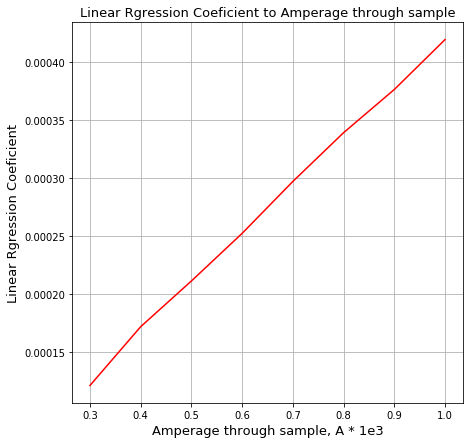

In [11]:
plt.figure(figsize=(7,7))
plt.plot(dataKI["I"] * 1e3, dataKI["K"], color = "red")

plt.title("Linear Rgression Coeficient to Amperage through sample", fontsize = 13)
plt.ylabel("Linear Rgression Coeficient", fontsize = 13)
plt.xlabel("Amperage through sample, A * 1e3", fontsize = 13)
plt.grid(True)
plt.show()

Проводим финальные вычисления

In [12]:
x1 = dataKI["I"].values
y1 = dataKI["K"].values
x1 = x1.reshape(8, 1)
y1 = y1.reshape(8, 1)
regr = linear_model.LinearRegression()
regr.fit(x1, y1)
HollCoef = regr.coef_[0][0] * 1.5 * 1e-3
HollCoef

0.0006322726555156304

In [13]:
sigma = (1e-6 * 3) / (1.5 * 1.7 * 1.724 * 1e-9)
sigma

682.407533779173

In [14]:
b = sigma * HollCoef * 1e4
b

4314.6762352643

In [13]:
n = 1 / (HollCoef * 1.6 * 1e-19)
n

1.0166990769091655e+22